In [1]:
lines = open('input1.txt', 'r').readlines()
left_list = []
right_list = []
for line in lines:
	first, second = line.split('   ')
	left_list.append(int(first))
	right_list.append(int(second))
left_list.sort()
right_list.sort()

difference = sum(abs(a-b) for a,b in zip(left_list, right_list))
print(f'The sum of the differences between the numbers in the list is {difference}')

numbers = set(right_list)
counts = {}
for number in numbers:
	counts[number] = right_list.count(number)

similarity_score = sum(number*counts[number] for number in left_list if number in counts)
print(f'The similarity score is {similarity_score}')

The sum of the differences between the numbers in the list is 3508942
The similarity score is 26593248


In [2]:
readings = open('input2.txt', 'r').readlines()

def is_safe(line):
	increasing = True
	decreasing = True
	correct_difference = True
	previous = -1
	for x in line.split(' '):
		x = int(x)
		if previous != -1:
			if x > previous:
				decreasing = False
			if x < previous:
				increasing = False
			if not 1 <= abs(x - previous) <= 3:
				correct_difference = False
		previous = x
	if not correct_difference or not (increasing or decreasing):
		return False
	else:
		return True

safe_readings = sum(1 if safe else 0 for safe in [is_safe(line) for line in readings])
print(f'The number of safe readings is {safe_readings}')

# Brute force the problem dampener
safe_dampened_readings = 0
for reading in readings:
	if is_safe(reading):
		safe_dampened_readings += 1
		continue
	numbers = reading.split(' ')
	for i in range(len(numbers)):
		dampened_reading = ' '.join(numbers[:i] + numbers[i+1:])
		if is_safe(dampened_reading):
			safe_dampened_readings += 1
			break

print(f'The number of safe dampened readings is {safe_dampened_readings}')

The number of safe readings is 213
The number of safe dampened readings is 285


In [3]:
import re
instructions = open('input3.txt', 'r').read()
non_corrupt = re.findall('mul\\((\\d+),(\\d+)\\)',instructions)
print(f'The sum of the real instructions is {sum(int(a)*int(b) for a,b in non_corrupt)}')

# Do or don't
enabled = True
total = 0

finished = False
remaining_instructions = instructions
while not finished:
	first_do = re.search('do\\(\\)', remaining_instructions)
	first_dont = re.search('don\'t\\(\\)', remaining_instructions)
	first_mul = re.search('mul\\((\\d+),(\\d+)\\)', remaining_instructions)

	if first_do is None and first_dont is None and first_mul is None:
		finished = True
		break

	do_hit = dont_hit = mul_hit = len(remaining_instructions)
	if first_do is not None:
		do_hit = first_do.span()[0]
	if first_dont is not None:
		dont_hit = first_dont.span()[0]
	if first_mul is not None:
		mul_hit = first_mul.span()[0]

	if do_hit < dont_hit and do_hit < mul_hit:
		enabled = True
		remaining_instructions = remaining_instructions[first_do.span()[1]:]
		
	if dont_hit < do_hit and dont_hit < mul_hit:
		enabled = False
		remaining_instructions = remaining_instructions[first_dont.span()[1]:]

	if mul_hit < do_hit and mul_hit < dont_hit:
		if enabled:
			total += int(first_mul.group(1)) * int(first_mul.group(2))
		remaining_instructions = remaining_instructions[first_mul.span()[1]:]
print(f'The sum of all conditional muls is {total}')

The sum of the real instructions is 166357705
The sum of all conditional muls is 88811886


In [4]:
word_search = open('input4.txt', 'r').readlines()

directions = [
	(1, 0),
	(1, 1),
	(0, 1),
	(-1, 1),
	(-1, 0),
	(-1, -1),
	(0, -1),
	(1, -1)
]

def look_for_word(row, column):
	if word_search[row][column] != 'X':
		return 0

	words_found = 0
	for direction in directions:
		for i in range(3):
			new_row = row + direction[1]*(i+1)
			new_column = column + direction[0]*(i+1)

			if new_row < 0 or new_row >= len(word_search):
				break
			if new_column < 0 or new_column >= len(word_search[new_row]):
				break

			new_letter = word_search[new_row][new_column]
			if i == 0 and new_letter != 'M':
				break
			if i == 1 and new_letter != 'A':
				break
			if i == 2 and new_letter == 'S':
				words_found += 1

	return words_found

def look_for_xmas(row, column):
	if word_search[row][column] != 'A':
		return 0

	if (not 0 < row < len(word_search) - 1) or (not 0 < column < len(word_search[column]) - 1):
		return 0

	first_diagonal = word_search[row-1][column-1] + word_search[row+1][column+1]
	if (not 'M' in first_diagonal) or (not 'S' in first_diagonal):
		return 0

	second_diagonal = word_search[row-1][column+1] + word_search[row+1][column-1]
	if (not 'M' in second_diagonal) or (not 'S' in second_diagonal):
		return 0

	return 1

words_found = 0
x_mases_found = 0
for row in range(len(word_search)):
	for column in range(len(word_search[row])):
		words_found += look_for_word(row, column)
		x_mases_found += look_for_xmas(row, column)
print(f'Found XMAS {words_found} times')
print(f'Found X-MAS {x_mases_found} times')

Found XMAS 2718 times
Found X-MAS 2046 times


In [5]:
full_input = open('input5.txt', 'r').read()

rules_text, updates_text = full_input.strip().split('\n\n')
rules = []
page_to_first_rule_map = {}
page_to_second_rule_map = {}
for rule in rules_text.split('\n'):
	first_page, second_page = [int(x) for x in rule.split('|')]
	rule_number = len(rules)
	rules.append((first_page, second_page))

	if first_page not in page_to_first_rule_map:
		page_to_first_rule_map[first_page] = set()
	page_to_first_rule_map[first_page].add(rule_number)

	if second_page not in page_to_second_rule_map:
		page_to_second_rule_map[second_page] = set()
	page_to_second_rule_map[second_page].add(rule_number)

def check_if_valid(numbers):
	valid = True
	all_numbers = set(numbers)
	iterated_numbers = set()
	for number in numbers:
		iterated_numbers.add(number)
		if number in page_to_second_rule_map:
			relevant_rules = page_to_second_rule_map[number]
			for rule in relevant_rules:
				first_page, _ = rules[rule]
				if first_page in all_numbers and first_page not in iterated_numbers:
					valid = False
	return valid

updates = [[int(x) for x in line.split(',')] for line in updates_text.split('\n')]
valid_updates = []
for index, numbers in enumerate(updates):
	if check_if_valid(numbers):
		valid_updates.append(index)
		
middle_numbers = 0
for valid_update in valid_updates:
	update_length = len(updates[valid_update])
	middle_numbers += updates[valid_update][update_length // 2]
print(f'The sum of middle pages in the valid updates is {middle_numbers}')

corrected_updates = []
for index, update in enumerate(updates):
	if index in valid_updates:
		continue
	reconstructed = []
	for number in update:
		must_be_before = set()
		if number in page_to_first_rule_map:
			rule_numbers = page_to_first_rule_map[number]
			for rule_number in rule_numbers:
				must_be_before.add(rules[rule_number][1])
		lowest_index = -1
		for other_number in must_be_before:
			if other_number in reconstructed:
				if lowest_index == -1 or reconstructed.index(other_number) < lowest_index:
					lowest_index = reconstructed.index(other_number)
		if lowest_index == -1:
			reconstructed.append(number)
		else:
			reconstructed.insert(lowest_index, number)
	corrected_updates.append(reconstructed)

middle_numbers = 0
for corrected_update in corrected_updates:
	middle_numbers += corrected_update[len(corrected_update) // 2]
print(f'The sum of middle pages in the corrected updates is {middle_numbers}')
	

The sum of middle pages in the valid updates is 4185
The sum of middle pages in the corrected updates is 4480


In [6]:
map_data = open('input6.txt', 'r').read()
directions = [(0, -1), (1, 0), (0, 1), (-1, 0)]
guard = None
obstacles = set()

def move_guard(guard, obstacles):
	position, direction = guard
	moved = False
	while True:
		next_position = (position[0] + directions[direction][0], position[1] + directions[direction][1])
		if next_position not in obstacles:
			return (next_position, direction)
		direction = (direction + 1) % len(directions)

map_lines = map_data.split('\n')
height = len(map_lines)
width = len(map_lines[0])

def is_guard_inside(guard):
	(x, y), _ = guard
	if 0 <= x < width and 0 <= y < height:
		return True
	else:
		return False

for y, line in enumerate(map_lines):
	for x, map_item in enumerate(line):
		if map_item == '#':
			obstacles.add((x, y))
		elif map_item == '^':
			guard = ((x, y), 0)

def find_steps_or_loop(guard, obstacles):
	visited_locations = set()
	location_directions = {}
	while is_guard_inside(guard):
		guard_position, guard_direction = guard
		visited_locations.add(guard_position)
		if guard_position not in location_directions:
			location_directions[guard_position] = set()
		if guard_direction in location_directions[guard_position]:
			return -1, visited_locations
		location_directions[guard_position].add(guard_direction)
		guard = move_guard(guard, obstacles)
	return len(visited_locations), visited_locations

number_of_steps, visited_locations = find_steps_or_loop(guard, obstacles)
print(f'The guard visits {number_of_steps} locations before leaving the map')

# Find loops
loop_placements = set()
for x,y in visited_locations:
	if (x,y) in obstacles or (x,y) == guard[0]:
		continue
	obstacles_copy = set(obstacles)
	obstacles_copy.add((x,y))
	if find_steps_or_loop(guard, obstacles_copy)[0] == -1:
		loop_placements.add((x,y))

print(f'There are {len(loop_placements)} locations that will set the guard into a loop')

The guard visits 5305 locations before leaving the map
There are 2143 locations that will set the guard into a loop


In [7]:
equations_input = open('input7.txt', 'r').readlines()
equations = []
for line in equations_input:
	parts = line.split(':')
	target = int(parts[0])
	numbers = [int(x) for x in parts[1].strip().split(' ')]
	equations.append((target, numbers))

def add_operator(old_value, new_number):
	return old_value + new_number

def multiply_operator(old_value, new_number):
	return old_value * new_number

def find_solvable_equations(equations, operators):

	def is_solvable(equation):
		target, numbers = equation
		if len(numbers) == 1:
			return target == numbers[0]
		else:
			results = []
			for operator in operators:
				new_start = operator(numbers[0], numbers[1])
				results.append(is_solvable((target, [new_start] + numbers[2:])))
			return any(results)

	solvable_equations = []
	for index, equation in enumerate(equations):
		if is_solvable(equation):
			solvable_equations.append(index)
	return solvable_equations

solvable_equations = find_solvable_equations(equations, [add_operator, multiply_operator])
solvable_sum = sum(equations[index][0] for index in solvable_equations)
print(f'The sum of the solvable equations is {solvable_sum}')

def concatenation_operator(old_value, new_number):
	return int(str(old_value) + str(new_number))

solvable_equations = find_solvable_equations(equations, [add_operator, multiply_operator, concatenation_operator])
solvable_sum = sum(equations[index][0] for index in solvable_equations)
print(f'The sum of the solvable equations is {solvable_sum}')

The sum of the solvable equations is 2501605301465
The sum of the solvable equations is 44841372855953


In [8]:
map_input = open('input8.txt', 'r').readlines()
height = len(map_input)
width = len(map_input[0].strip())
frequencies = {}
occupied = set()

for y, line in enumerate(map_input):
	for x, character in enumerate(line.strip()):
		if character == '.':
			continue
		if character not in frequencies:
			frequencies[character] = []
		frequencies[character].append((x, y))
		#occupied.add((x,y))

anti_nodes = set()
anti_nodes_all = set()
for frequency in frequencies:
	positions = frequencies[frequency]
	for i in range(len(positions)):
		for j in range(i+1, len(positions)):
			x1, y1 = positions[i]
			x2, y2 = positions[j]

			diff_x = x2 - x1
			diff_y = y2 - y1

			x3 = x1 - diff_x
			y3 = y1 - diff_y
			if 0 <= x3 < width and 0 <= y3 < height and (x3, y3) not in occupied:
				anti_nodes.add((x3, y3))

			x4 = x2 + diff_x
			y4 = y2 + diff_y
			if 0 <= x4 < width and 0 <= y4 < height and (x4, y4) not in occupied:
				anti_nodes.add((x4, y4))

			x_iterative = x1
			y_iterative = y1

			while 0 <= x_iterative < width and 0 <= y_iterative < height:
				x_iterative -= diff_x
				y_iterative -= diff_y

			x_iterative += diff_x
			y_iterative += diff_y

			while 0 <= x_iterative < width and 0 <= y_iterative < height:
				anti_nodes_all.add((x_iterative, y_iterative))
				x_iterative += diff_x
				y_iterative += diff_y

print(f'There are {len(anti_nodes)} anti-nodes')
print(f'There are {len(anti_nodes_all)} anti-nodes in part two')

There are 409 anti-nodes
There are 1308 anti-nodes in part two


In [67]:
file_system = open('input9.txt', 'r').read()
#file_system = '2333133121414131402'

class Interval:
	def __init__(self, start, end, id):
		self.start = start
		self.end = end
		self.id = id

	def get_checksum(self):
		return self.id * (self.end * (self.end + 1) - self.start * (self.start - 1)) // 2

intervals = []
position_counter = 0
id_counter = 0
is_data = True
for length_digit in file_system.strip():
	length = int(length_digit)

	if is_data:
		intervals.append(Interval(position_counter, position_counter + length - 1, id_counter))
		id_counter += 1
	position_counter += length
	is_data = not is_data

part_two_intervals = list(intervals)

def find_gaps(intervals):
	expected_start = 0
	gaps = []
	for interval in intervals:
		if interval.start != expected_start:
			gaps.append((expected_start, interval.start - 1))
		expected_start = interval.end + 1
	return gaps

def print_test_string(intervals):
	counter = 0
	test_string = ''
	while True:
		found_interval = None
		has_larger = False
		for interval in intervals:
			if interval.start <= counter <= interval.end:
				found_interval = interval
				break
			elif interval.start > counter:
				has_larger = True
				
		counter += 1
		if found_interval is None:
			if not has_larger:
				break
			test_string += '.'
		else:
			test_string += str(found_interval.id)
	
	print(test_string)

while len(gaps := find_gaps(intervals)) > 0:
	first_gap = gaps[0]
	last_interval = intervals.pop()
	gap_length = first_gap[1] - first_gap[0] + 1
	interval_length = last_interval.end - last_interval.start + 1

	intervals_to_append = []

	if interval_length <= gap_length:
		intervals_to_append.append(Interval(first_gap[0], first_gap[0] + interval_length - 1, last_interval.id))
	else:
		intervals_to_append.append(Interval(first_gap[0], first_gap[1], last_interval.id))
		intervals_to_append.append(Interval(last_interval.start + gap_length, last_interval.end, last_interval.id))
	# Insertion sort
	for i in range(len(intervals)):
		if len(intervals_to_append) == 0:
			break
		if intervals_to_append[0].start < intervals[i].start:
			insertion_interval = intervals_to_append.pop(0)
			intervals.insert(i, insertion_interval)

	while len(intervals_to_append) > 0:
		remaining_interval = intervals_to_append.pop(0)
		intervals.append(remaining_interval)

checksum = sum(i.get_checksum() for i in intervals)
print(f'The checksum of the rearranged file system is {checksum}')

files = list(part_two_intervals)
for file in files[::-1]:
	file_length = file.end + 1 - file.start
	gaps = find_gaps(part_two_intervals)
	for gap in gaps:
		gap_length = gap[1] + 1 - gap[0]
		if gap_length >= file_length and gap[0] < file.start:
			part_two_intervals = [interval for interval in part_two_intervals if interval.id != file.id]
			part_two_intervals.append(Interval(gap[0], gap[0] + file_length - 1, file.id))
			part_two_intervals.sort(key=lambda i: i.start)
			break


checksum = sum(i.get_checksum() for i in part_two_intervals)
print(f'The checksum of the rearranged file system is {checksum}')

The checksum of the rearranged file system is 6435922584968
The checksum of the rearranged file system is 6469636832766


In [15]:
data = '''89010123
78121874
87430965
96549874
45678903
32019012
01329801
10456732'''

data = open('input10.txt', 'r').read()

topo_map = [[int(x) for x in line.strip()] for line in data.strip().split('\n')]
height = len(topo_map)
width = len(topo_map[0])
directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]


def add_tuples(t1, t2):
	return t1[0] + t2[0], t1[1] + t2[1]


def find_trails(x, y, previous_trail):
	level = topo_map[y][x]
	trails = []
	for direction in directions:
		neighbour_x, neighbour_y = add_tuples((x, y), direction)
		if (not 0 <= neighbour_x < width) or (not 0 <= neighbour_y < height):
			continue
		neighbour_level = topo_map[neighbour_y][neighbour_x]
		if neighbour_level == level+1:
			trail_so_far = list(previous_trail) + [(neighbour_x, neighbour_y)]
			if neighbour_level == 9:
				trails.append(trail_so_far)
			else:
				trails = trails + find_trails(neighbour_x, neighbour_y, trail_so_far)
	return trails

trails = []
for x in range(width):
	for y in range(height):
		if topo_map[y][x] == 0:
			trails = trails + find_trails(x, y, [(x, y)])

trailheads = {}
for trail in trails:
	trailhead = trail[0]
	if trailhead not in trailheads:
		trailheads[trailhead] = []
	trailheads[trailhead].append(trail)

def get_trailhead_score(list_of_trails):
	return len(set([trail[-1] for trail in list_of_trails]))

trailhead_scores = sum(get_trailhead_score(trailheads[trailhead]) for trailhead in trailheads)
print(f'The sum of the scores of the trailheads is {trailhead_scores}')

trailhead_ratings = sum(len(trailheads[trailhead]) for trailhead in trailheads)
print(f'The sum of the ratings of the trailheads is {trailhead_ratings}')

The sum of the scores of the trailheads is 694
The sum of the ratings of the trailheads is 1497


In [19]:
stone_data = open('input11.txt', 'r').read()
#stone_data = '125 17'

stones = {}
for stone in [int(x) for x in stone_data.strip().split(' ')]:
	if stone not in stones:
		stones[stone] = 0
	stones[stone] += 1

def add_to_stones(stones, key, value):
	if key not in stones:
		stones[key] = 0
	stones[key] += value

for i in range(75):
	new_stones = {}
	for stone in stones:
		digits = len(str(stone))
		if stone == 0:
			add_to_stones(new_stones, 1, stones[stone])
		elif digits % 2 == 0:
			stone_one = int(str(stone)[:digits//2])
			stone_two = int(str(stone)[digits//2:])
			add_to_stones(new_stones, stone_one, stones[stone])
			add_to_stones(new_stones, stone_two, stones[stone])
		else:
			add_to_stones(new_stones, 2024*stone, stones[stone])
	stones = new_stones
	if i == 24 or i == 74:
		number_of_stones = sum(stones[stone] for stone in stones)
		print(f'The number of stones after {i+1} blinks is {number_of_stones}')

The number of stones after 25 blinks is 189167
The number of stones after 75 blinks is 225253278506288


In [15]:
from collections import defaultdict
from functools import reduce

garden_input = open('input12.txt', 'r').read()
directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]


def get_number_of_neighbours_inside_region(region: set[tuple[int, int]], position: tuple[int, int]) -> int:
	px, py = position
	possible_points = set([(px + dx, py + dy) for dx, dy in directions])
	return len(region.intersection(possible_points))


def build_regions(positions: set[tuple[int, int]]) -> list[set[tuple[int, int]]]:
	found_regions = []
	for position in positions:
		touching_regions = [region for region in found_regions if
							get_number_of_neighbours_inside_region(region, position) > 0]
		# Create a large region out of all the regions we've found that touch this point. If there are no touching
		# regions, the new combined region will just consist of the position itself.
		combined_region = reduce(lambda cumulative_region, new_region: cumulative_region.union(new_region),
								 touching_regions, set())
		combined_region.add(position)
		# Remove all touching regions from the previously found regions, and add the new combined region
		found_regions = [region for region in found_regions if region not in touching_regions]
		found_regions.append(combined_region)
	return found_regions


def find_region_perimeter(region: set[tuple[int, int]]) -> int:
	return sum(4 - get_number_of_neighbours_inside_region(region, position) for position in region)


def find_number_of_sides(region: set[tuple[int, int]]) -> int:
	# Create a list of edge_pieces, ordered by which orientation their edge has. A corner piece may be part of more than
	# one orientation. Later, find all the regions of edge that touch each other and whose edges have the same
	# orientation, since these must necessarily comprise a side.
	edge_orientations = []
	for dx, dy in directions:
		edge_orientations.append(set([(px, py) for px, py in region if (px + dx, py + dy) not in region]))
	return sum(len(build_regions(positions)) for positions in edge_orientations)


plants = defaultdict(set)
for y, line in enumerate(garden_input.strip().split('\n')):
	for x, plant_type in enumerate(line):
		plants[plant_type].add((x, y))

regions = [region for region in build_regions(plants[plant_type]) for plant_type in plants]

fence_price = sum(len(region) * find_region_perimeter(region) for region in regions)
print(f'The total price of fencing is {fence_price}')

bulk_price = fence_price = sum(len(region) * find_number_of_sides(region) for region in regions)
print(f'The total bulk price of fencing is {bulk_price}')


The total price of fencing is 1490528
The total bulk price of fencing is 848952


In [38]:
import re
machine_behaviours = open('input13.txt', 'r').read()

machines = []
far_machines = []
for machine_input in machine_behaviours.split('\n\n'):
	button_a_match = re.search(r'Button A: X([+-]\d+), Y([+-]\d+)', machine_input)
	ax = int(button_a_match.group(1))
	ay = int(button_a_match.group(2))
	
	button_b_match = re.search(r'Button B: X([+-]\d+), Y([+-]\d+)', machine_input)
	bx = int(button_b_match.group(1))
	by = int(button_b_match.group(2))
	
	prize_match = re.search(r'Prize: X=([+-]*\d+), Y=([+-]*\d+)', machine_input)
	px = int(prize_match.group(1))
	py = int(prize_match.group(2))

	machines.append(((ax, ay), (bx, by), (px, py)))
	far_machines.append(((ax, ay), (bx, by), (px+10000000000000, py+10000000000000)))


def find_cheapest_path(machine):
	(ax, ay), (bx, by), (px, py) = machine
	n = (px - bx*py/by) / (ax - ay*bx/by)
	k = (py - n*ay)/by

	# Check that these are actually integer solutions
	n = int(round(n))
	k = int(round(k))

	if not n*ax + k*bx == px:
		return -1, -1
	if not n*ay + k*by == py:
		return -1, -1
	return n, k


def find_token_cost(machines):
	return sum(3*n + k for n, k in [find_cheapest_path(machine) for machine in machines] if n != -1 and k != -1)


print(f'The cheapest (and only) way to win the most prizes costs {find_token_cost(machines)}')
print(f'The cheapest (and only) way to win the most prizes in part two is {find_token_cost(far_machines)}')

The cheapest (and only) way to win the most prizes costs 28887
The cheapest (and only) way to win the most prizes in part two is 96979582619758


The safety factor is 230435667
The following picture appeared at time 7709:


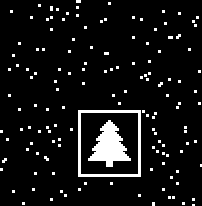

In [1]:
import re
from functools import reduce
import time
from PIL import Image, ImageDraw

robots_input = '''p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3'''

width = 11
height = 7

robots_input = open('input14.txt', 'r').read()
width = 101
height = 103

robots = []
for line in robots_input.strip().split('\n'):
	robot_match = re.search(r'p=([+-]*\d+),([+-]*\d+) v=([+-]*\d+),([+-]*\d+)', line)
	px = int(robot_match.group(1))
	py = int(robot_match.group(2))
	vx = int(robot_match.group(3))
	vy = int(robot_match.group(4))
	robots.append(((px, py), (vx, vy)))

def move_robot(robot, time):
	(px, py), (vx, vy) = robot
	px = (px + vx*time) % width
	py = (py + vy*time) % height
	return (px, py), (vx, vy)

def simulate(robots, time):
	return [move_robot(robot, time) for robot in robots]

def count_quadrants(robots):
	counted = [[], [], [], []]
	for robot in robots:
		(px, py), _ = robot
		if px < width // 2 and py < height // 2:
			counted[0].append(robot)
		elif px > width // 2 and py < height // 2:
			counted[1].append(robot)
		elif px < width // 2 and py > height // 2:
			counted[2].append(robot)
		elif px > width // 2 and py > height // 2:
			counted[3].append(robot)
	return counted

moved_robots = simulate(robots, 100)
quadrant_count = count_quadrants(moved_robots)
safety_factor = reduce(lambda old, new: old * len(new), quadrant_count, 1)
print(f'The safety factor is {safety_factor}')

for i in range(1):
	elapsed = 7709 + i*101
	moved_robots = simulate(robots, elapsed)
	positions = set([(px, py) for (px, py), _ in moved_robots])
	img = Image.new(mode='RGB', size=(2*width, 2*height))
	draw = ImageDraw.Draw(img)
	for (px, py), _ in moved_robots:
		draw.rectangle(xy = (2*px, 2*py, 2*px+2, 2*py+2), fill=(255, 255,255))
	print(f'The following picture appeared at time {elapsed}:')
	display(img)